Epoch 1/50
51/51 [==============================] - 20s 42ms/step - loss: 0.0072
Epoch 2/50
51/51 [==============================] - 2s 42ms/step - loss: 6.5272e-04
Epoch 3/50
51/51 [==============================] - 2s 41ms/step - loss: 6.3868e-04
Epoch 4/50
51/51 [==============================] - 2s 46ms/step - loss: 6.2031e-04
Epoch 5/50
51/51 [==============================] - 4s 70ms/step - loss: 6.3971e-04
Epoch 6/50
51/51 [==============================] - 2s 42ms/step - loss: 6.0458e-04
Epoch 7/50
51/51 [==============================] - 1s 25ms/step - loss: 5.8424e-04
Epoch 8/50
51/51 [==============================] - 1s 20ms/step - loss: 5.6850e-04
Epoch 9/50
51/51 [==============================] - 1s 20ms/step - loss: 5.6010e-04
Epoch 10/50
51/51 [==============================] - 1s 21ms/step - loss: 5.5798e-04
Epoch 11/50
51/51 [==============================] - 1s 22ms/step - loss: 5.5900e-04
Epoch 12/50
51/51 [==============================] - 1s 21ms/step - loss: 4.9

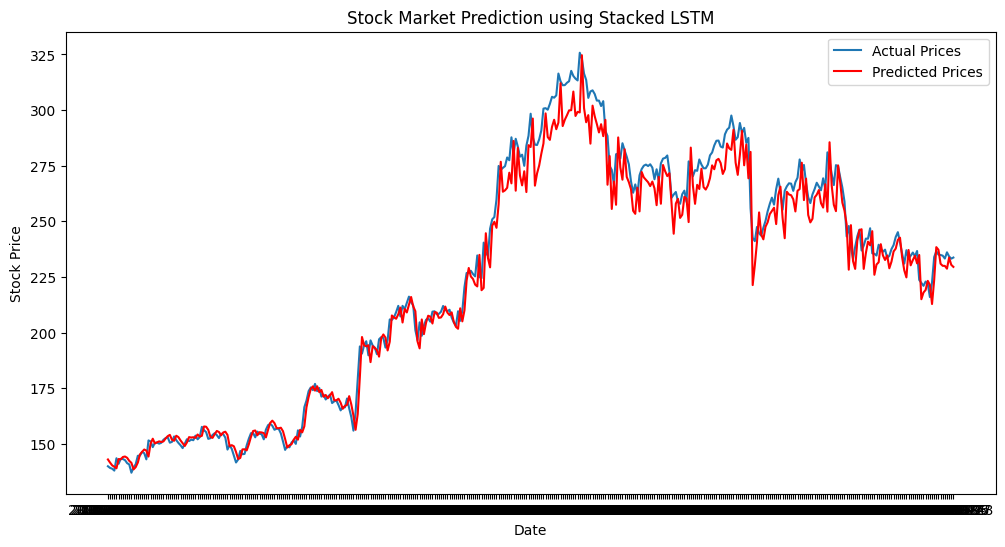

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load your dataset (e.g., stock price data)
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data = data.sort_values(by="Date")

# Extract the relevant column (e.g., closing price)
closing_prices = data["Close"].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data["Date"][train_size + seq_length:], closing_prices[train_size + seq_length:], label="Actual Prices")
plt.plot(data["Date"][train_size + seq_length:], predicted_values, label="Predicted Prices", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Market Prediction using Stacked LSTM")
plt.legend()
plt.show()
